In [1]:
import pandas as pd
import numpy as np
import os
from nltk.tokenize import word_tokenize

In [2]:
raw_df = pd.read_csv('Scotts_Run_stats.csv')

In [3]:
raw_df.head(10)

,Pokemon_Name,HP,Attack,Defense,Special,Speed,Type,Type_two,Duel_Type,Can_the_pokemon_still_evolve,Level_up_moves,TM_moves,Lvl_up_group,Ending_level,Ending_time,Number_of_resets
0,Kabutops,60,115,105,70,80,Rock,Water,1,0,NaN,NaN,Medium Fast,57,1:16:43,NaN
1,Kangaskhan,105,95,80,40,90,Normal,Null,0,0,NaN,NaN,Medium Fast,62,1:04:56,1.0
2,Tauros,75,100,95,70,110,Normal,Null,0,0,NaN,NaN,Slow,59,1:10:12,2.0
3,Mew,100,100,100,100,100,Psychic,Null,0,0,NaN,NaN,Medium Slow,59,1:17:48,NaN
4,Snorlax,160,110,65,65,30,Normal,Null,0,0,NaN,NaN,Slow,54,1:37:38,NaN
5,Pinsir,65,125,100,55,85,Bug,Null,0,0,NaN,NaN,Slow,64,1:40:38,NaN
6,Omastar,70,60,125,115,55,Rock,Water,1,0,NaN,NaN,Medium Fast,59,1:21:34,NaN
7,Starmie,60,75,85,100,115,Water,Psychic,1,0,NaN,NaN,Slow,57,1:41:01,NaN
8,Cloyster,50,95,180,85,70,Water,Ice,1,0,NaN,NaN,Slow,61,2:00:55,NaN
9,Golem,80,110,130,55,45,Rock,Ground,1,0,NaN,NaN,Medium Slow,67,1:13:35,2.0


In [4]:
raw_df.info()
# Set time column as a time series later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pokemon_Name                  40 non-null     object 
 1   HP                            40 non-null     int64  
 2   Attack                        40 non-null     int64  
 3   Defense                       40 non-null     int64  
 4   Special                       40 non-null     int64  
 5   Speed                         40 non-null     int64  
 6   Type                          40 non-null     object 
 7   Type_two                      40 non-null     object 
 8   Duel_Type                     40 non-null     int64  
 9   Can_the_pokemon_still_evolve  40 non-null     int64  
 10  Level_up_moves                0 non-null      float64
 11  TM_moves                      0 non-null      float64
 12  Lvl_up_group                  40 non-null     object 
 13  Ending_

In [5]:
raw_df.sort_values('Pokemon_Name', inplace=True)
raw_df.reset_index(inplace=True)
raw_df = raw_df.drop('Level_up_moves',axis=1)
raw_df = raw_df.drop('TM_moves',axis=1)

raw_df.head()

,index,Pokemon_Name,HP,Attack,Defense,Special,Speed,Type,Type_two,Duel_Type,Can_the_pokemon_still_evolve,Lvl_up_group,Ending_level,Ending_time,Number_of_resets
0,29,Aerodactyl,80,105,65,60,130,Rock,Flying,1,0,Slow,67,2:55:18,35.0
1,12,Alakazam,55,50,45,135,120,Psychic,Null,0,0,Medium Slow,57,1:14:37,3.0
2,26,Beedrill,65,80,40,45,75,Bug,Poison,1,0,Medium Fast,65,2:20:30,NaN
3,25,Butterfree <3,60,45,50,80,70,Bug,Flying,1,0,Medium Fast,65,2:05:55,NaN
4,24,Chansey,250,5,5,105,50,Normal,Null,0,0,Fast,67,NaN,NaN


In [6]:
raw_df = raw_df.drop(columns='index')
raw_df.head()

,Pokemon_Name,HP,Attack,Defense,Special,Speed,Type,Type_two,Duel_Type,Can_the_pokemon_still_evolve,Lvl_up_group,Ending_level,Ending_time,Number_of_resets
0,Aerodactyl,80,105,65,60,130,Rock,Flying,1,0,Slow,67,2:55:18,35.0
1,Alakazam,55,50,45,135,120,Psychic,Null,0,0,Medium Slow,57,1:14:37,3.0
2,Beedrill,65,80,40,45,75,Bug,Poison,1,0,Medium Fast,65,2:20:30,NaN
3,Butterfree <3,60,45,50,80,70,Bug,Flying,1,0,Medium Fast,65,2:05:55,NaN
4,Chansey,250,5,5,105,50,Normal,Null,0,0,Fast,67,NaN,NaN


In [243]:
# assign dataset names
list_of_names = list(raw_df['Pokemon_Name'])

In [244]:
# create empty list
poke_moves_list = []

In [245]:
directory = "Pokemon_movesets/Lvl_up/"
# Make sure files are in alphabetical order
for filename in os.listdir(directory):
    temp_df = pd.read_csv("C:/Users/jared/data_science/Pokemon_yellow_runs/Pokemon_movesets/Lvl_up/"+ filename)
    temp_df = temp_df.drop(columns='Unnamed: 0')
    pkm_name_1 = word_tokenize(filename)
    pkm_name = pkm_name_1[0]
    temp_df2 = temp_df.assign(name = pkm_name)
    print(temp_df2)
    poke_moves_list.append(temp_df2)
print(poke_moves_list[0])

   Level  Attack Name   Power  Acc.  PP  Effect %        name
0      0  Wing Attack      35   100  35         0  Aerodactyl
1      0      Agility  Status   100  30         0  Aerodactyl
2     33   Supersonic  Status    55  20         0  Aerodactyl
3     38         Bite      60   100  25        10  Aerodactyl
4     45    Take Down      90    85  20         0  Aerodactyl
5     54   Hyper Beam     150    90   5         0  Aerodactyl
   Level Attack Name   Power  Acc.  PP  Effect %      name
0      0    Teleport  Status   100  20         0  Alakazam
1      0     Kinesis  Status    80  15         0  Alakazam
2     16   Confusion      50   100  25        10  Alakazam
3     20     Disable  Status    55  20         0  Alakazam
4     27     Psybeam      65   100  20        10  Alakazam
5     31     Recover  Status   100  20         0  Alakazam
6     38     Psychic      90   100  10        30  Alakazam
7     42     Reflect  Status   100  20         0  Alakazam
   Level   Attack Name   Power  Acc

6     55  Flamethrower      95   100  15        10  Magmar
   Level    Attack Name   Power  Acc.  PP  Effect %       name
0      0         Tackle      35    95  35         0  Magnemite
1     21     Sonic Boom   Fixed    90  20         0  Magnemite
2     25  Thunder Shock      40   100  30         0  Magnemite
3     29     Supersonic  Status    55  20         0  Magnemite
4     35   Thunder Wave  Status   100  20        10  Magnemite
5     41          Swift      60   100  20         0  Magnemite
6     47        Screech  Status    85  40         0  Magnemite
   Level  Attack Name   Power  Acc.  PP  Effect %    name
0      0      Scratch      40   100  35         0  Meowth
1      0        Growl  Status   100  40         0  Meowth
2     12         Bite      60   100  25        10  Meowth
3     17      Pay Day      40   100  20         0  Meowth
4     24      Screech  Status    85  40         0  Meowth
5     33  Fury Swipes      18    80  15         0  Meowth
6     44        Slash      70  

In [246]:
list_of_moves = []
# Creating a list of all the moves learned by lvl up of the pokemon so far
for frame in poke_moves_list:
    temp_df = pd.DataFrame(frame['Attack Name'])
    pokemons_moves = list(temp_df['Attack Name'])
    for name in pokemons_moves:
        list_of_moves.append(name)

print(list_of_moves)

['Wing Attack', 'Agility', 'Supersonic', 'Bite', 'Take Down', 'Hyper Beam', 'Teleport', 'Kinesis', 'Confusion', 'Disable', 'Psybeam', 'Recover', 'Psychic', 'Reflect', 'Fury Attack', 'Fury Attack', 'Focus Energy', 'Twineedle', 'Rage', 'Pin Missile', 'Agility', 'Confusion', 'Confusion', 'Poison Powder', 'Stun Spore', 'Sleep Powder', 'Supersonic', 'Whirlwind', 'Gust', 'Psybeam', 'Pound', 'Tail Whip', 'Double Slap', 'Sing', 'Growl', 'Minimize', 'Defense Curl', 'Light Screen', 'Double-Edge', 'Pound', 'Growl', 'Sing', 'Double Slap', 'Minimize', 'Metronome', 'Defense Curl', 'Light Screen', 'Withdraw', 'Supersonic', 'Clamp', 'Aurora Beam', 'Spike Cannon', 'Tackle', 'Tail Whip', 'Sand-Attack', 'Growl', 'Quick Attack', 'Bite', 'Focus Energy', 'Take Down', 'Quick Attack', 'Leer', 'Thunder Shock', 'Screech', 'Thunder Punch', 'Light Screen', 'Thunder', 'Peck', 'Sand-Attack', 'Leer', 'Fury Attack', 'Swords Dance', 'Agility', 'Slash', 'Lick', 'Confuse Ray', 'Night Shade', 'Hypnosis', 'Dream Eater', '

In [247]:
# Doing TM moves now
tm_move_list = []
directory = "Pokemon_movesets/TMs/"
# Make sure files are in alphabetical order
for filename in os.listdir(directory):
    temp_df = pd.read_csv("C:/Users/jared/data_science/Pokemon_yellow_runs/Pokemon_movesets/TMs/"+ filename)
    temp_df = temp_df.drop(columns='Unnamed: 0')
    print(temp_df)
    tm_move_list.append(temp_df)

   TM/HM #  Attack Name   Power   Acc.  PP  Effect %
0     TM02   Razor Wind      80   74.6  10         0
1     TM04    Whirlwind  Status   85.0  20         0
2     TM06        Toxic  Status   85.0  10         0
3     TM09    Take Down      90   85.0  20         0
4     TM10  Double-Edge     100  100.0  15         0
5     TM15   Hyper Beam     150   90.0   5         0
6     TM20         Rage      20  100.0  20         0
7     TM23  Dragon Rage   Fixed  100.0  10         0
8     TM31        Mimic  Status  100.0  10         0
9     TM32  Double Team  Status  100.0  15         0
10    TM33      Reflect  Status  100.0  20         0
11    TM34         Bide  Status  100.0  10         0
12    TM38   Fire Blast     120   85.0   5        33
13    TM39        Swift      60  100.0  20         0
14    TM43   Sky Attack     140   90.0   5         0
15    TM44         Rest  Status  100.0  10         0
16    TM50   Substitute  Status  100.0  10         0
17    HM02          Fly      70   95.0  15    

22    HM04       Strength      80   100  15         0
   TM/HM #    Attack Name   Power   Acc.  PP  Effect %
0     TM01     Mega Punch      80   85.0  20         0
1     TM05      Mega Kick     120   74.6   5         0
2     TM06          Toxic  Status   85.0  10         0
3     TM08      Body Slam      85  100.0  15        33
4     TM09      Take Down      90   85.0  20         0
5     TM10    Double-Edge     100  100.0  15         0
6     TM15     Hyper Beam     150   90.0   5         0
7     TM17     Submission      80   80.0  25         0
8     TM18        Counter   Fixed  100.0  20         0
9     TM19   Seismic Toss   Fixed  100.0  20         0
10    TM20           Rage      20  100.0  20         0
11    TM26     Earthquake     100  100.0  10         0
12    TM27        Fissure   Fixed   30.0   5         0
13    TM28            Dig     100  100.0  10         0
14    TM31          Mimic  Status  100.0  10         0
15    TM32    Double Team  Status  100.0  15         0
16    TM34 

15    HM01           Cut      50    95  30         0
   TM/HM #  Attack Name   Power  Acc.  PP  Effect %
0     TM06        Toxic  Status    85  10         0
1     TM07   Horn Drill   Fixed    30   5         0
2     TM08    Body Slam      85   100  15        33
3     TM09    Take Down      90    85  20         0
4     TM10  Double-Edge     100   100  15         0
5     TM13     Ice Beam      95   100  10        10
6     TM14     Blizzard     120    90   5        10
7     TM15   Hyper Beam     150    90   5         0
8     TM20         Rage      20   100  20         0
9     TM24  Thunderbolt      95   100  15        10
10    TM25      Thunder     120    70  10        10
11    TM26   Earthquake     100   100  10         0
12    TM27      Fissure   Fixed    30   5         0
13    TM31        Mimic  Status   100  10         0
14    TM32  Double Team  Status   100  15         0
15    TM34         Bide  Status   100  10         0
16    TM38   Fire Blast     120    85   5        33
17    TM40 

In [248]:
for frame in tm_move_list:
    temp_df = pd.DataFrame(frame['Attack Name'])
    pokemons_moves = list(temp_df['Attack Name'])
    for name in pokemons_moves:
        list_of_moves.append(name)

print(list_of_moves)

['Wing Attack', 'Agility', 'Supersonic', 'Bite', 'Take Down', 'Hyper Beam', 'Teleport', 'Kinesis', 'Confusion', 'Disable', 'Psybeam', 'Recover', 'Psychic', 'Reflect', 'Fury Attack', 'Fury Attack', 'Focus Energy', 'Twineedle', 'Rage', 'Pin Missile', 'Agility', 'Confusion', 'Confusion', 'Poison Powder', 'Stun Spore', 'Sleep Powder', 'Supersonic', 'Whirlwind', 'Gust', 'Psybeam', 'Pound', 'Tail Whip', 'Double Slap', 'Sing', 'Growl', 'Minimize', 'Defense Curl', 'Light Screen', 'Double-Edge', 'Pound', 'Growl', 'Sing', 'Double Slap', 'Minimize', 'Metronome', 'Defense Curl', 'Light Screen', 'Withdraw', 'Supersonic', 'Clamp', 'Aurora Beam', 'Spike Cannon', 'Tackle', 'Tail Whip', 'Sand-Attack', 'Growl', 'Quick Attack', 'Bite', 'Focus Energy', 'Take Down', 'Quick Attack', 'Leer', 'Thunder Shock', 'Screech', 'Thunder Punch', 'Light Screen', 'Thunder', 'Peck', 'Sand-Attack', 'Leer', 'Fury Attack', 'Swords Dance', 'Agility', 'Slash', 'Lick', 'Confuse Ray', 'Night Shade', 'Hypnosis', 'Dream Eater', '

In [249]:
# getting rid of duplicates

list_of_moves = list(set(list_of_moves))
print(list_of_moves)

['Kinesis', 'Scratch', 'Mega Kick', 'Quick Attack', 'Counter', 'Light Screen', 'Rest', 'Stomp', 'Bide', 'Supersonic', 'Bite', 'Bubble Beam', 'Gust', 'Lick', 'Wing Attack', 'Toxic', 'Focus Energy', 'Horn Drill', 'Reflect', 'Egg Bomb', 'Ember', 'Screech', 'Slam', 'Swift', 'Super Fang', 'Dig', 'Mimic', 'Fury Swipes', 'Confusion', 'Flash', 'Spike Cannon', 'Poison Gas', 'Acid Armor', 'Pay Day', 'Swords Dance', 'Flamethrower', 'Hyper Fang', 'Sharpen', 'Rock Throw', 'Poison Sting', 'Transform', 'Thunder Shock', 'Harden', 'Body Slam', 'Hydro Pump', 'Leech Life', 'Substitute', 'Acid', 'Slash', 'Rage', 'Leer', 'Hyper Beam', 'Twineedle', 'Low Kick', 'Sludge', 'Conversion', 'Stun Spore', 'Aurora Beam', 'Guillotine', 'Solar Beam', 'Sand-Attack', 'Skull Bash', 'Dragon Rage', 'Submission', 'Rock Slide', 'Recover', 'Poison Powder', 'Horn Attack', 'Double Team', 'Explosion', 'Sing', 'Dream Eater', 'Mist', 'Tri Attack', 'Strength', 'Constrict', 'Vine Whip', 'Psybeam', 'Bind', 'Jump Kick', 'Meditate', 'T

In [250]:
# Creating columns for each move in the game

for move in list_of_moves:
    raw_df[move] = 0

In [251]:
## IMPORTANT NOTE THIS CELL ONLY WORKS ON LEVEL UP MOVES, a future cell will do the TM moves

for frame in poke_moves_list:
    pokemon_name = frame['name'][0]
    pokemons_moves = list(frame['Attack Name'])
    for pokemon in range(len(raw_df)):
        if raw_df.loc[pokemon, 'Pokemon_Name'] == pokemon_name:
            for move in pokemons_moves:
                raw_df.loc[pokemon, move] = 1
    
raw_df.head()

,Pokemon_Name,HP,Attack,Defense,Special,Speed,Type,Type_two,Duel_Type,Can_the_pokemon_still_evolve,...,Growl,Fury Attack,Karate Chop,Fire Blast,Psychic,Defense Curl,Mega Drain,Take Down,Fly,Minimize
0,Aerodactyl,80,105,65,60,130,Rock,Flying,1,0,...,0,0,0,0,0,0,0,1,0,0
1,Alakazam,55,50,45,135,120,Psychic,Null,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Beedrill,65,80,40,45,75,Bug,Poison,1,0,...,0,1,0,0,0,0,0,0,0,0
3,Butterfree <3,60,45,50,80,70,Bug,Flying,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Chansey,250,5,5,105,50,Normal,Null,0,0,...,1,0,0,0,0,1,0,0,0,1


In [252]:
directory = "Pokemon_movesets/Lvl_up/"
# Make sure files are in alphabetical order
for filename in os.listdir(directory):
    temp_df = pd.read_csv("C:/Users/jared/data_science/Pokemon_yellow_runs/Pokemon_movesets/Lvl_up/"+ filename)
    temp_df = temp_df.drop(columns='Unnamed: 0')
    pkm_name_1 = word_tokenize(filename)
    pkm_name = pkm_name_1[0]
    temp_df2 = temp_df.assign(name = pkm_name)
    print(temp_df2)
    poke_moves_list.append(temp_df2)
print(poke_moves_list[0])

   Level  Attack Name   Power  Acc.  PP  Effect %        name
0      0  Wing Attack      35   100  35         0  Aerodactyl
1      0      Agility  Status   100  30         0  Aerodactyl
2     33   Supersonic  Status    55  20         0  Aerodactyl
3     38         Bite      60   100  25        10  Aerodactyl
4     45    Take Down      90    85  20         0  Aerodactyl
5     54   Hyper Beam     150    90   5         0  Aerodactyl
   Level Attack Name   Power  Acc.  PP  Effect %      name
0      0    Teleport  Status   100  20         0  Alakazam
1      0     Kinesis  Status    80  15         0  Alakazam
2     16   Confusion      50   100  25        10  Alakazam
3     20     Disable  Status    55  20         0  Alakazam
4     27     Psybeam      65   100  20        10  Alakazam
5     31     Recover  Status   100  20         0  Alakazam
6     38     Psychic      90   100  10        30  Alakazam
7     42     Reflect  Status   100  20         0  Alakazam
   Level   Attack Name   Power  Acc

In [253]:
# Doing TM moves now
tm_move_list = []
directory = "Pokemon_movesets/TMs/"
# Make sure files are in alphabetical order
for filename in os.listdir(directory):
    temp_df = pd.read_csv("C:/Users/jared/data_science/Pokemon_yellow_runs/Pokemon_movesets/TMs/"+ filename)
    temp_df = temp_df.drop(columns='Unnamed: 0')
    pkm_name_1 = word_tokenize(filename)
    pkm_name = pkm_name_1[0]
    temp_df2 = temp_df.assign(name = pkm_name)
    tm_move_list.append(temp_df2)
print(tm_move_list[0])

   TM/HM #  Attack Name   Power   Acc.  PP  Effect %        name
0     TM02   Razor Wind      80   74.6  10         0  Aerodactyl
1     TM04    Whirlwind  Status   85.0  20         0  Aerodactyl
2     TM06        Toxic  Status   85.0  10         0  Aerodactyl
3     TM09    Take Down      90   85.0  20         0  Aerodactyl
4     TM10  Double-Edge     100  100.0  15         0  Aerodactyl
5     TM15   Hyper Beam     150   90.0   5         0  Aerodactyl
6     TM20         Rage      20  100.0  20         0  Aerodactyl
7     TM23  Dragon Rage   Fixed  100.0  10         0  Aerodactyl
8     TM31        Mimic  Status  100.0  10         0  Aerodactyl
9     TM32  Double Team  Status  100.0  15         0  Aerodactyl
10    TM33      Reflect  Status  100.0  20         0  Aerodactyl
11    TM34         Bide  Status  100.0  10         0  Aerodactyl
12    TM38   Fire Blast     120   85.0   5        33  Aerodactyl
13    TM39        Swift      60  100.0  20         0  Aerodactyl
14    TM43   Sky Attack  

In [254]:
## This cell does the TM moves

for frame in tm_move_list:
    pokemon_name = frame['name'][0]
    pokemons_moves = list(frame['Attack Name'])
    for pokemon in range(len(raw_df)):
        if raw_df.loc[pokemon, 'Pokemon_Name'] == pokemon_name:
            for move in pokemons_moves:
                raw_df.loc[pokemon, move] = 1
    
raw_df.head()

,Pokemon_Name,HP,Attack,Defense,Special,Speed,Type,Type_two,Duel_Type,Can_the_pokemon_still_evolve,...,Growl,Fury Attack,Karate Chop,Fire Blast,Psychic,Defense Curl,Mega Drain,Take Down,Fly,Minimize
0,Aerodactyl,80,105,65,60,130,Rock,Flying,1,0,...,0,0,0,1,0,0,0,1,1,0
1,Alakazam,55,50,45,135,120,Psychic,Null,0,0,...,0,0,0,0,1,0,0,1,0,0
2,Beedrill,65,80,40,45,75,Bug,Poison,1,0,...,0,1,0,0,0,0,1,1,0,0
3,Butterfree <3,60,45,50,80,70,Bug,Flying,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Chansey,250,5,5,105,50,Normal,Null,0,0,...,1,0,0,1,1,1,0,1,0,1


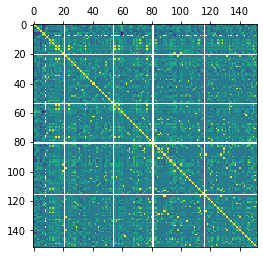

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.matshow(raw_df.corr())
plt.show()

In [267]:
level_corr = pd.DataFrame(raw_df[raw_df.columns].corr()['Ending_level'])
level_corr = level_corr.Ending_level.astype(float)
level_corr = level_corr.sort_values()

In [269]:
level_corr.head(25)

Hyper Beam    -0.625953
Special       -0.444194
Attack        -0.423207
Defense       -0.383538
Surf          -0.383050
Blizzard      -0.326527
Ice Beam      -0.326527
Skull Bash    -0.283264
Double-Edge   -0.258881
Speed         -0.234036
HP            -0.232764
Duel_Type     -0.230175
Recover       -0.219589
Psybeam       -0.219589
Absorb        -0.219589
Leer          -0.209790
Bubble Beam   -0.207868
Water Gun     -0.207868
Horn Drill    -0.207557
Headbutt      -0.207557
Amnesia       -0.207557
Psychic       -0.202260
Psywave       -0.202260
Razor Wind    -0.197880
Metronome     -0.197426
Name: Ending_level, dtype: float64

In [ ]:
# NEED TO DO, remove co correlated columns like special and psywave
# Could create a scoring system that scales every column and gives each pokemon a score
# 

In [270]:
level_corr_bad = level_corr.sort_values(ascending=False)
level_corr_bad.head(25)

Ending_level                    1.000000
Can_the_pokemon_still_evolve    0.749102
Sonic Boom                      0.538445
Number_of_resets                0.454282
Screech                         0.442484
Light Screen                    0.387546
Defense Curl                    0.284465
Thunder Shock                   0.280018
Flash                           0.243206
Thunder Wave                    0.243206
Double Slap                     0.230237
Sing                            0.230237
Explosion                       0.229458
Tackle                          0.215872
Growl                           0.214816
Sand-Attack                     0.189509
Pound                           0.189313
Thunder                         0.188445
Thunderbolt                     0.188445
Swift                           0.188445
Fury Swipes                     0.170500
Quick Attack                    0.165525
Disable                         0.165525
Sludge                          0.157469
Acid Armor      